In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

import requests as re

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

sns.set_context('poster')
sns.set_style('whitegrid')

In [2]:
df = pd.read_json('train_data.json')

In [3]:
df.columns

Index(['Balcony', 'Cats Allowed', 'Common Outdoor Space', 'Dining Room',
       'Dishwasher', 'Dogs Allowed', 'Doorman', 'Elevator', 'Exclusive',
       'Fitness Center', 'Garden/Patio', 'Hardwood Floors',
       'High Speed Internet', 'Laundry In Building', 'Laundry in Building',
       'Laundry in Unit', 'Loft', 'New Construction', 'No Fee',
       'Outdoor Space', 'Pre-War', 'Roof Deck', 'Swimming Pool', 'Terrace',
       'Wheelchair Access', 'bathrooms', 'bedrooms', 'building_id', 'created',
       'description', 'display_address', 'features', 'index', 'interest_level',
       'latitude', 'level_0', 'listing_id', 'longitude', 'manager_id',
       'photos', 'price', 'street_address'],
      dtype='object')

Things to think about grouping
1. cats allowed / dogs allowed
2. doorman / exclusive
3. balcony / common outdoor space / garden/patio / roof deck / terrace
4. fitness center / swimming pool
5. 

In [4]:
df.interest_level.value_counts()

low       29147
medium     9491
high       3280
Name: interest_level, dtype: int64

In [5]:
test = pd.read_json('test_data.json')

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7434 entries, 0 to 999
Data columns (total 41 columns):
Balcony                 7434 non-null int64
Cats Allowed            7434 non-null int64
Common Outdoor Space    7434 non-null int64
Dining Room             7434 non-null int64
Dishwasher              7434 non-null int64
Dogs Allowed            7434 non-null int64
Doorman                 7434 non-null int64
Elevator                7434 non-null int64
Exclusive               7434 non-null int64
Fitness Center          7434 non-null int64
Garden/Patio            7434 non-null int64
Hardwood Floors         7434 non-null int64
High Speed Internet     7434 non-null int64
Laundry In Building     7434 non-null int64
Laundry in Building     7434 non-null int64
Laundry in Unit         7434 non-null int64
Loft                    7434 non-null int64
New Construction        7434 non-null int64
No Fee                  7434 non-null int64
Outdoor Space           7434 non-null int64
Pre-War       

In [7]:
# See if two laundry in buildings are the same
df['Laundry In Building'].value_counts()

0    39710
1     2208
Name: Laundry In Building, dtype: int64

In [8]:
# See if two laundry in buildings are the same
df['Laundry in Building'].value_counts()

0    28025
1    13893
Name: Laundry in Building, dtype: int64

In [9]:
def combine_laundry(col1, col2):
    if col1 != 0:
        return col1
    else:
        return col2

In [10]:
# Aggregate to create one laundry in building column that isn't case sensitive
df['laundry_in_building'] = df.apply(lambda row: combine_laundry(row['Laundry in Building'], row['Laundry In Building']), axis=1)

In [11]:
def interestValues(x):
    if 'low' in x:
        return 0
    elif 'med' in x:
        return .5
    else:
        return 1

In [12]:
df['interestVal'] = df['interest_level'].apply(interestValues)

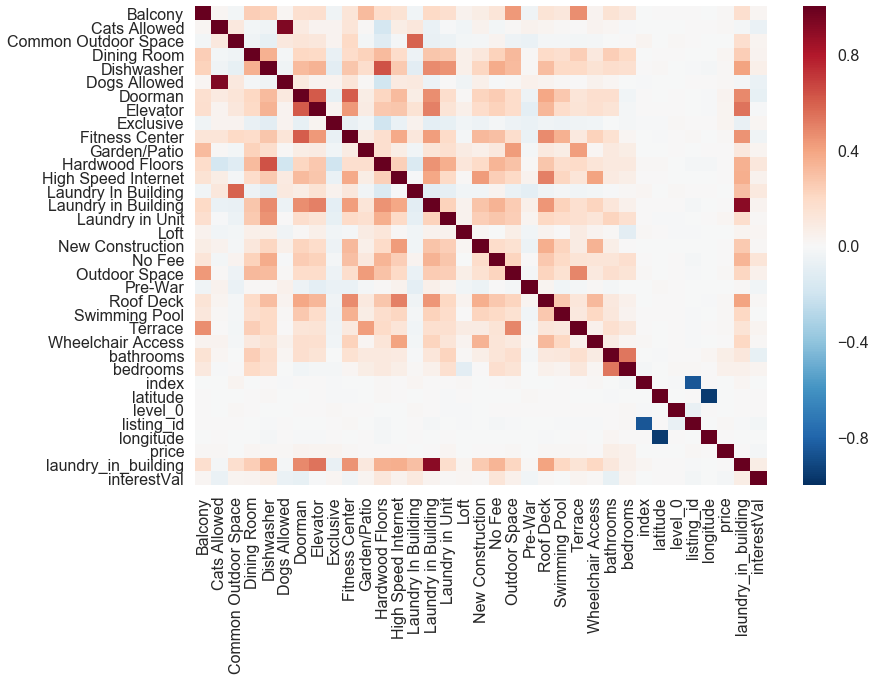

In [35]:
# Correlation Matrix of Data
sns.heatmap(df.corr())

In [13]:
df.interest_level.value_counts()

low       29147
medium     9491
high       3280
Name: interest_level, dtype: int64

In [14]:
df.interestVal.value_counts()

0.0    29147
0.5     9491
1.0     3280
Name: interestVal, dtype: int64

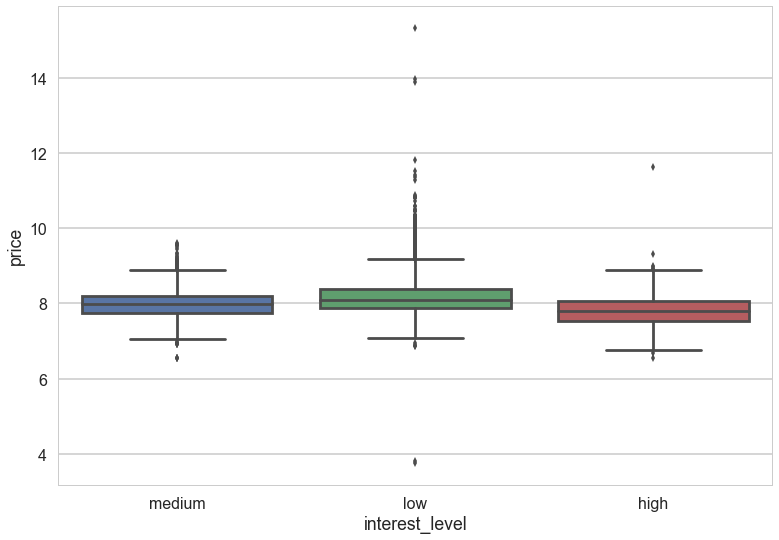

In [15]:
# Side by Side Box Plot of log(Price) vs. High, Medium, and Low Interest
sns.boxplot(x=df['interest_level'], y=df['price'].apply(np.log))

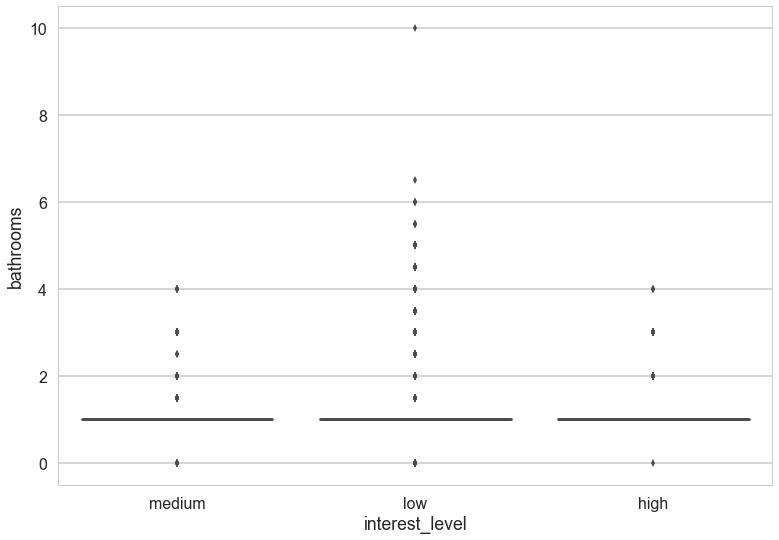

In [16]:
# Side by Side Box Plot of Bathrooms vs. High, Medium, and Low Interest
sns.boxplot(x=df['interest_level'], y=df['bathrooms'])

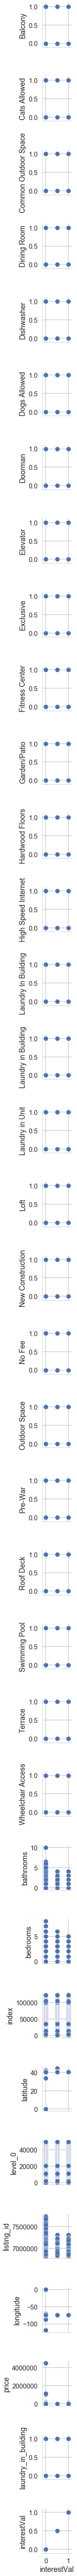

In [17]:
# See if we can get spread of interest level by different predictors
cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df, x_vars=['interestVal'], y_vars=cols)
plt.savefig('interestLevelPairwise.png')

In [18]:
# Create interaction term for cats and dogs allowed
df['pets_allowed'] = df['Cats Allowed'] * df['Dogs Allowed']

In [19]:
# Create interaction term for doorman/exclusive
df['door_excl'] = df['Doorman'] * df['Exclusive']

In [20]:
# Create interaction term for fitness oriented
df['fitness_oriented'] = df['Fitness Center'] * df['Swimming Pool']

In [21]:
# Create transformed term that creates a score for outdoor spaces
df['outdoor_score'] = (df['Outdoor Space'] + df['Balcony'] + df['Common Outdoor Space'] + df['Garden/Patio'] + df['Roof Deck'] + df['Terrace']) / 6

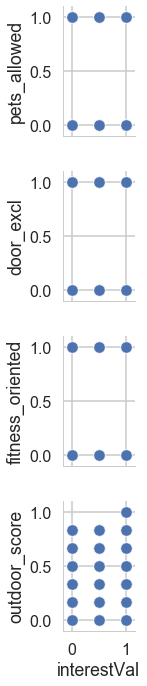

In [22]:
# Interest level vs. new interaction terms
sns.pairplot(df, x_vars=['interestVal'], y_vars=['pets_allowed', 'door_excl', 'fitness_oriented', 'outdoor_score'])

Only high interest listings have all 6 outdoor features.  So if a listing does not have a balcony, common outdoor space, garden/patio, roof deck, or terrace, then we know it is not high interest.

In [23]:
# ADA compatible interaction term
df['ada'] = df['Elevator'] * df['Wheelchair Access']

In [24]:
# Luxury Score Term
df['lux_score'] = (df['Exclusive'] + df['Doorman'] + df['Outdoor Space'] + df['New Construction'] + df['Roof Deck'] + df['Fitness Center'] + df['Swimming Pool'] + df['Elevator'] + df['Laundry in Unit'] + df['Hardwood Floors']) / 10

In [25]:
def count_features(feats):
    return len(feats)

In [26]:
# Number of Features per Listing
df['num_features'] = df['features'].apply(lambda x: count_features(x))

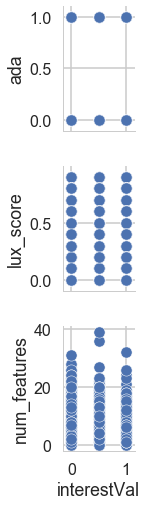

In [27]:
# Interest level vs. new interaction terms
sns.pairplot(df, x_vars=['interestVal'], y_vars=['ada', 'lux_score', 'num_features'])

It is interesting that a higher number of features doesn't seem to indicate more interest.  The highest number of features indicate medium amount of interest.

In [40]:
df.columns

Index(['Balcony', 'Cats Allowed', 'Common Outdoor Space', 'Dining Room',
       'Dishwasher', 'Dogs Allowed', 'Doorman', 'Elevator', 'Exclusive',
       'Fitness Center', 'Garden/Patio', 'Hardwood Floors',
       'High Speed Internet', 'Laundry In Building', 'Laundry in Building',
       'Laundry in Unit', 'Loft', 'New Construction', 'No Fee',
       'Outdoor Space', 'Pre-War', 'Roof Deck', 'Swimming Pool', 'Terrace',
       'Wheelchair Access', 'bathrooms', 'bedrooms', 'building_id', 'created',
       'description', 'display_address', 'features', 'index', 'interest_level',
       'latitude', 'level_0', 'listing_id', 'longitude', 'manager_id',
       'photos', 'price', 'street_address', 'laundry_in_building',
       'interestVal', 'pets_allowed', 'door_excl', 'fitness_oriented',
       'outdoor_score', 'ada', 'lux_score', 'num_features'],
      dtype='object')

In [42]:
print(type(df.select_dtypes(include=['float64', 'int64'])))

<class 'pandas.core.frame.DataFrame'>


In [55]:
# Split into a training and a test set from training data
reduced_df = df.select_dtypes(include=['float64', 'int64'])
X_tr, X_test, Y_tr, Y_test = train_test_split(reduced_df.drop(['interestVal'], axis=1), df['interestVal'], test_size=0.3, random_state=42)

In [57]:
# TODO
# Rename terms to use stat models OLS
reduced_df = college2.rename(columns={
    'F.Undergrad':'f_undergrad',
    'P.Undergrad':'p_undergrad',
    'Room.Board':'room_board',
    'S.F.Ratio':'s_f_ratio',
    'perc.alumni':'perc_alumni',
    'Grad.Rate':'grad_rate'
})

NameError: name 'college2' is not defined

In [56]:
# TODO
# Run Stat Models OLS with Interaction Terms
linear1 = smf.ols('interestVal~Balcony+Cats Allowed' data=X_tr)

SyntaxError: invalid syntax (<ipython-input-56-d88a7ae39dad>, line 2)

In [47]:
# Run Scikit Learn Linear Regression with Interaction terms
X = df.select_dtypes(include=['float64', 'int64'])
Y = pd.DataFrame()
Y['interestVal'] = df['interestVal']
linear1 = LinearRegression().fit(X,Y)
linear1.score(X, X)

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [46]:
dir(linear1)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'decision_function',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'residues_',
 'score',
 'set_params',
 'singular_']

In [15]:
df['bedrooms'] = df['bedrooms'].apply(float)
df['bedrooms'].fillna(0, inplace=True)
df['bathrooms'].fillna(0, inplace=True)

In [9]:
df['studio'] = df['description'].apply(lambda x : 'studio' in x.lower())

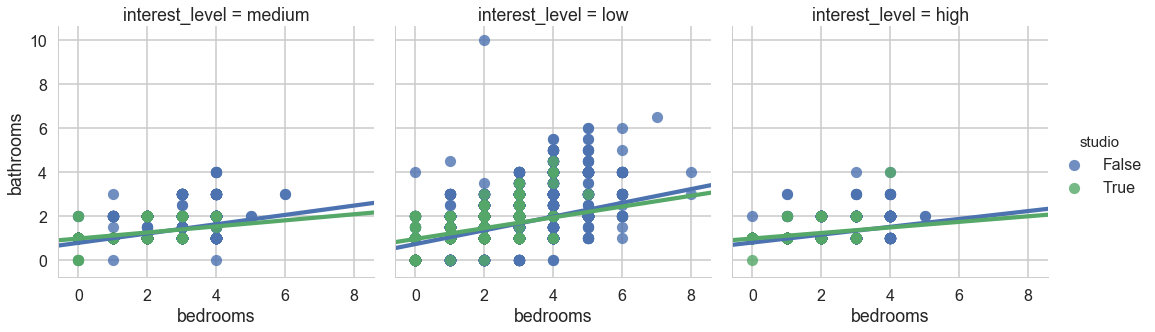

In [39]:
sns.lmplot(col='interest_level',x='bedrooms', y='bathrooms', data=df, ci=None, hue='studio')

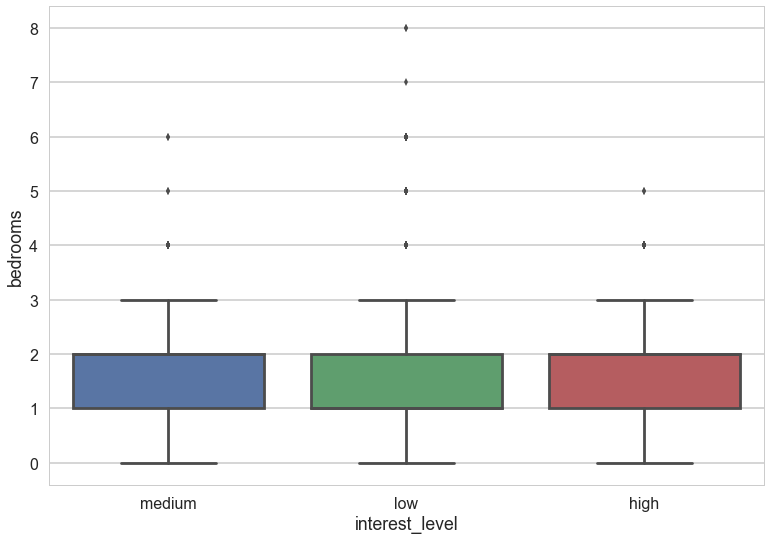

In [11]:
# Side by Side Box Plot of Bedrooms vs. High, Medium, and Low Interest
sns.boxplot(x=df['interest_level'], y=df['bedrooms'])

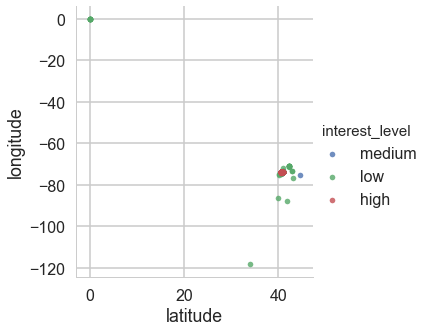

In [14]:
# See if geographical location affects interest level
sns.lmplot(x="latitude", y="longitude", hue="interest_level", data=df, fit_reg=False, legend=True, markers='.')

Those points are plotted at the (lat, long) of (0, -120). This is the standard return of googlemap's api if it cannot find the address due to formatting. Therefore, we should drop them.

In [71]:
# Drop outliers
outRem = df[df['latitude'] > 5]
outRem = outRem[outRem['longitude'] > -110]

(-75.0, -72.5)

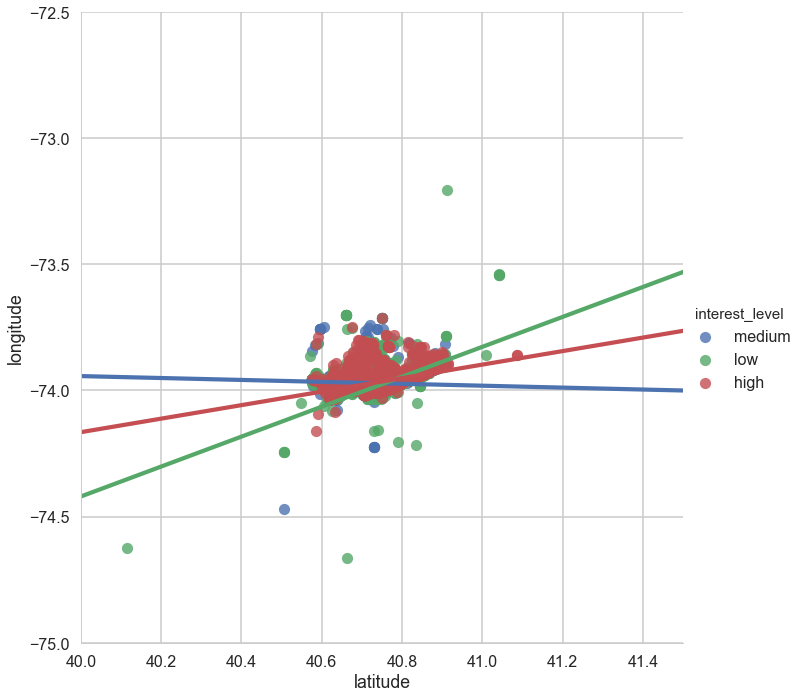

In [73]:
# Listing Location (without Outliers) Hued by Interest Level
sns.lmplot(x='latitude', y='longitude', hue='interest_level', data = outRem, size=10, ci=False)
plt.xlim([40, 41.5])
plt.ylim([-75.0,-72.5])

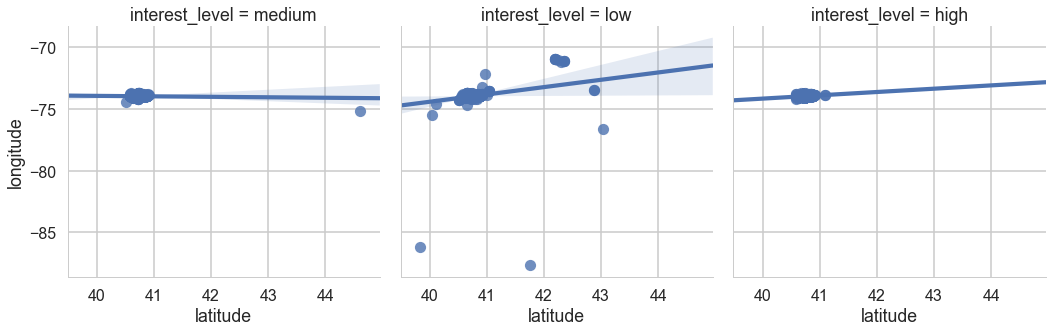

In [74]:
# Location Plotted on Separate Plots for Each Interest Level
sns.lmplot(x='latitude', y='longitude', col='interest_level', data = outRem)

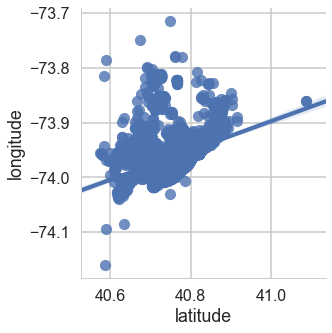

In [75]:
# Location of High Interest Listings
sns.lmplot(x='latitude', y='longitude', data = outRem[outRem['interest_level']=='high'])

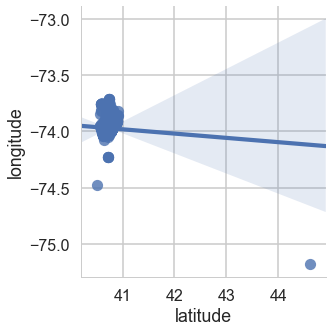

In [54]:
sns.lmplot(x='latitude', y='longitude', data = outRem[outRem['interest_level']=='medium'])

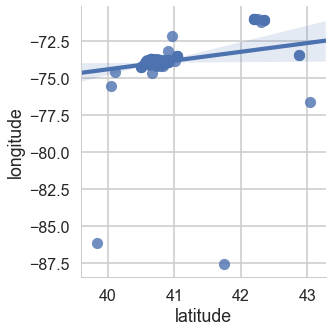

In [55]:
sns.lmplot(x='latitude', y='longitude', data = outRem[outRem['interest_level']=='low'])